In [ ]:
import pandas as pd

# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Display basic info
print(customers.info())
print(products.info())
print(transactions.info())

# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

#### *Step 2: Perform EDA*
Perform exploratory data analysis to understand the data distribution, relationships, and trends.

### *Task 3: Customer Segmentation*

#### *Step 1: Preprocess Data*
Combine customer and transaction data for clustering.

In [ ]:
# Use customer_features from Task 2
clustering_data = customer_features[['total_spent', 'avg_transaction_value', 'total_transactions']]

#### *Step 2: Perform Clustering*
Use K-Means clustering and evaluate using the Davies-Bouldin Index.

Davies-Bouldin Index: 0.6022910408086608


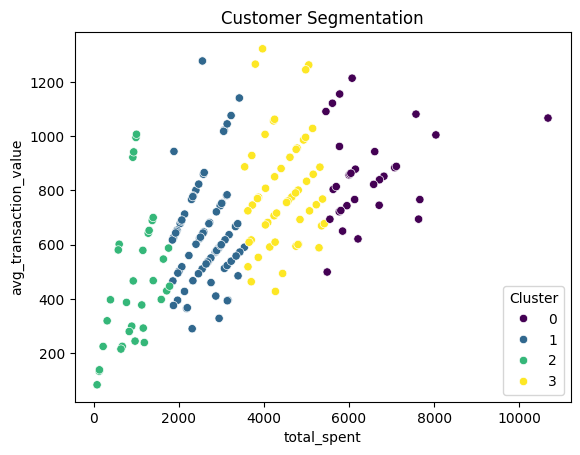

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Perform clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(clustering_data)

# Add cluster labels to customer_features
customer_features['Cluster'] = clusters

# Evaluate clustering
db_index = davies_bouldin_score(clustering_data, clusters)
print(f'Davies-Bouldin Index: {db_index}')

# Visualize clusters
sns.scatterplot(data=customer_features, x='total_spent', y='avg_transaction_value', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation')
plt.show()